In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JD23tamu/MS_Analytics_Project2/main/data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Which is target variable?**

Taget variable is HeartDisease.

In [3]:
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [4]:
# check counts for heart disease or not
# balanced or not?
round(df['HeartDisease'].value_counts()/len(df['HeartDisease'])*100)

1    55.0
0    45.0
Name: HeartDisease, dtype: float64

The target variable of this dataset, is mostly balanced.

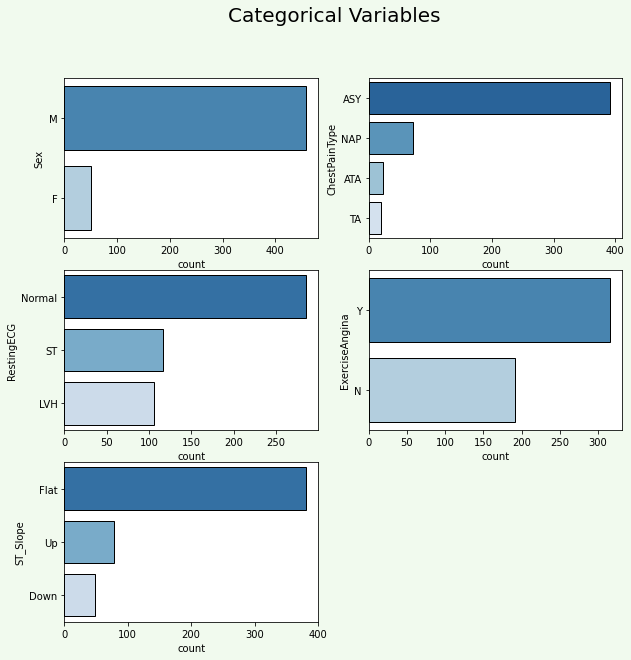

In [7]:
heart_df = df[df['HeartDisease'] == 1]
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('#f1faee')

j = 1
for i in heart_df.columns: 
    if heart_df[i].dtypes  == 'object':
        plt.subplot(3, 2, j)
        sns.countplot(y = heart_df[i], data = heart_df, order=heart_df[i].value_counts().index, palette='Blues_r', edgecolor='black')
        #plt.title(i, fontsize=15, color='black')
        plt.suptitle('Categorical Variables', fontsize=20)
        j = j + 1
fig.savefig("images\\test.png")

Above graph shows: 

* Male getting more heartdisease than female
* Asymptomatic chest pain shows more heartdisease
* Exercise Angina showing more heartdisease
* ST Slope Flat has more heartdisease

Found same result form co-relation matrix plot.


### Numeric variables distribution and Outliers

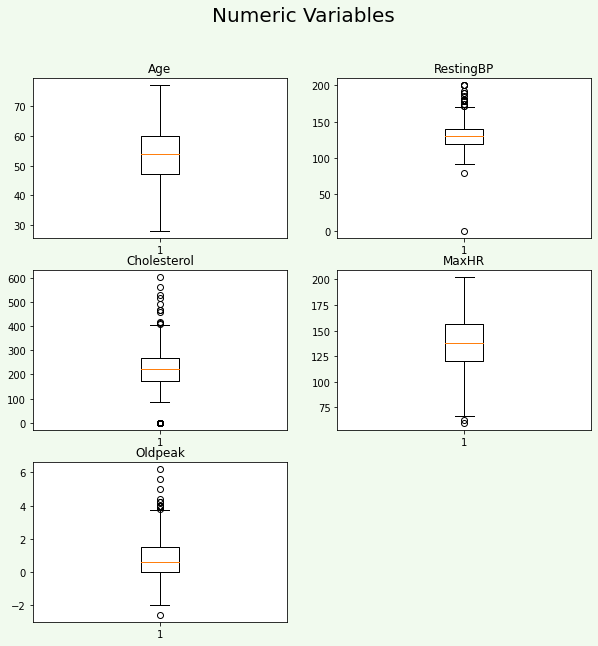

In [6]:
col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
num_col = df[col]

fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('#f1faee')

c = 1
for i in num_col.columns: 
        plt.subplot(3, 2, c)
        plt.boxplot(num_col[i])
        plt.title(i, fontsize=12, color='Black')
        plt.suptitle('Numeric Variables', fontsize=20)
        c = c + 1

fig.savefig("images\\test2.png")

Above histogram shows:

* Age is unimodal but slightly skewed to left and no outliers
* RetingBP is unimodal and normally distributed, has outliers
* Cholesterol is bi-modal and has outliers
* Maximun heart rate is unimodal and normally distributed has couple of outliers
* Old peak is bi-modal and slightly skewed towards right and has some outliers

In [ ]:
# Dummy variables
pd.set_option('display.max_columns', 40)

# Select categorical variables
cat = df.select_dtypes(include=object).columns
df_dummy = pd.get_dummies(df, columns=cat)  

# Logistic Regression 
### 
Logistic regression is used to obtain odds ratio in the presence of more than one explanatory variable.  
The procedure is quite similar to multiple linear regression, with the exception that the response variable is binomial.  
The result is the impact of each variable on the odds ratio of the observed event of interest.  

### Without Normalization

### Model 1

In [ ]:
inp = df_dummy.drop(columns='HeartDisease')
out = df_dummy['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(
    inp, out, test_size=0.20, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

log_reg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_lr), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr), 3))

In [ ]:
df_dummy.head()

### With Standardization

### Model 2

From the sklearn library, we need to use StandardScaler to implement Standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler
# input, output var declarations 
Y = df_dummy['HeartDisease']
X = df_dummy[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
columns = X.columns
# apply Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
# Dataset of all dummy columns
df2 = df_dummy.iloc[:,7:]
# Merge the Standardization column with dummy columns
X_nr = X_std.join(df2)

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(
    X_nr, Y, test_size=0.20, random_state=20)

In [ ]:
log_reg_nr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
y_pred_lr_nr = log_reg_nr.predict(x_test)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_lr_nr), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr_nr), 3))

#### Outlier Imputation

Will Work on this, later!

From the outliers plot, we see 4 columns have outliers. Replace outliers with Median.

### Confusion Matrix for Logistic Regression

TP  FP
FN  TN
If errors must be, better to have more FP than FN as shown in this confusion matrix.  
It's better to be sure, than miss an event.  
The F1 Score is the 2*((precision*recall)/(precision+recall))

In [ ]:
predictedLabels: np.ndarray = log_reg_nr.predict(x_test)
confusionMatrixDF: pd.DataFrame = pd.DataFrame(metrics.confusion_matrix(y_test,predictedLabels),index=['Actual +','Actual -'],columns=['Predicted +', 'Predicted -'])
print(confusionMatrixDF)

In [ ]:
print(metrics.classification_report(y_test, y_pred_lr))

### Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

##### Model 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(random_state=20, n_estimators=100)
 
# x_train, x_test, y_train, y_test
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred_rf), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 3))

##### Model 4

Tuned to the model to assign parameters

In [ ]:
n_estimators = [100, 200, 300]
max_depth = [10, 20, 30]
max_depth.append(None)
max_features = ['auto', 'sqrt']
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

params = {'n_estimators': n_estimators, 'max_features': max_features,
          'max_depth': max_depth, 'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RF = RandomForestClassifier(random_state=20)

grid_search = GridSearchCV(estimator = RF, 
                           param_grid = params,
                           scoring = 'f1',
                           cv = 5,
                           verbose=0, 
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print("best score: ", grid_search.best_score_)
print("best param: ", grid_search.best_params_)

In [ ]:
best_para = grid_search.best_params_
rf_2 = RandomForestClassifier(random_state=20, **best_para)
                            
rf_2 = rf_2.fit(x_train, y_train)
y_pred_rf_2 = rf_2.predict(x_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred_rf_2), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf_2), 3))

#### Confusion Matrix for Random Forest

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_rf_2))

In [ ]:
    # predictedLabels: np.ndarray = log_reg_nr.predict(x_test)
    confusionMatrixDF: pd.DataFrame = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_rf_2),index=['Actual +','Actual -'],columns=['Predicted +', 'Predicted -'])
    print(confusionMatrixDF)
    print(metrics.classification_report(y_test, y_pred_rf_2))

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf_2))

# Feature Selection 


In [ ]:
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize=(15,8))
imp = mutual_info_classif(inp, out)
feature_imp = pd.Series(imp, df_dummy.columns[0:len(df_dummy.columns)-1])
feature_imp = feature_imp.sort_values(ascending=True)
feature_imp.plot(kind = 'barh', color = 'teal')
plt.title("Feature importance plot")
plt.savefig("images\\featureImportance.png")

Lets select top 10 features and apply random forest model.

##### Model 5 

Random forest model with top 10 features

In [ ]:
best_feat_df = df_dummy[['ST_Slope_Flat','Sex_M','ST_Slope_Down','RestingECG_ST','ExerciseAngina_N', 
                         'Oldpeak','ChestPainType_ASY','MaxHR','Sex_F','Cholesterol','HeartDisease']]

inp_feat = best_feat_df.drop(columns='HeartDisease')
out_feat = best_feat_df['HeartDisease']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    inp_feat, out_feat, test_size=0.20, random_state=20)

In [ ]:
rf_feat = RandomForestClassifier(random_state=20, n_estimators=100)
 
rf_feat = rf_feat.fit(x_train_2, y_train_2)
y_pred_rf_feat = rf_feat.predict(x_test_2)

print('Accuracy score: ', round(accuracy_score(y_test_2, y_pred_rf_feat), 3))
print('F1 Score: ', round(f1_score(y_test_2, y_pred_rf_feat), 3))

# Conclusion

The Random forest model with all the features gives highest accuracy.

Out of all 4 models Random forest performs better. The model 3 could be the potential best fit for our data. Moreover, accuracy is 89%.
The model is confusion matrix shows:

    * True Positive = 71
    * False Positive = 14
    * False Negative = 6
    * True Negative = 93

The model is producing fewer False Negatives than False Positives.

There is definitely room for improvement. In this project we tried to implement 2 supervised models i.e Logistic and Random forest. 